# Ablation Experiments


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
sns.set_context("paper")
colors = sns.color_palette("muted", 10)
dpi = 600

In [2]:
# 评价指标函数
def MAE(pred, true):
    return np.mean(np.abs(pred - true))


def RMSE(pred, true):
    pred = pred.values.flatten()
    true = true.values.flatten()
    rmse = ((pred - true) ** 2).mean() ** 0.5
    return rmse


def MSE(pred, true):
    pred = pred.values.flatten()
    true = true.values.flatten()
    mse = ((pred - true) ** 2).mean()
    return mse


def CCCscore(y_pred, y_true, mode='all'):
    # pred: shape{n sample, m cell}
    if mode == 'all':
        y_pred = y_pred.reshape(-1, 1)
        y_true = y_true.reshape(-1, 1)
    elif mode == 'avg':
        pass
    ccc_value = 0
    for i in range(y_pred.shape[1]):
        r = np.corrcoef(y_pred[:, i], y_true[:, i])[0, 1]
        # Mean
        mean_true = np.mean(y_true[:, i])
        mean_pred = np.mean(y_pred[:, i])
        # Variance
        var_true = np.var(y_true[:, i])
        var_pred = np.var(y_pred[:, i])
        # Standard deviation
        sd_true = np.std(y_true[:, i])
        sd_pred = np.std(y_pred[:, i])
        # Calculate CCC
        numerator = 2 * r * sd_true * sd_pred
        denominator = var_true + var_pred + (mean_true - mean_pred) ** 2
        ccc = numerator / denominator
        ccc_value += ccc
    return ccc_value / y_pred.shape[1]

# 画出每种细胞的CCC柱状图，在一张图片上展示
def plot_ccc_comparison(data, metric='CCC', filename=None):

    # 创建一个副本以避免修改原始 DataFrame
    data_to_plot = data.copy()

    # 1. 定义新旧标签的映射关系
    label_map = {
        'Bcells': 'B cell',
        'CD4Tcells': 'CD4 T cell',
        'CD8Tcells': 'CD8 T cell',
        'Monocytes': 'Monocyte',
        'NK': 'NK cell',
        'Unknown': 'Unknown'
    }

    # 2. 将映射应用到 'CellType' 列
    # .get(x, x) ensures that if a cell type is not in the map, it remains unchanged
    data_to_plot['CellType'] = data_to_plot['CellType'].apply(lambda x: label_map.get(x, x))

    plt.figure(figsize=(10,4))
    # 使用修改后的 data_to_plot 进行绘图
    ax = sns.barplot(data=data_to_plot, x="CellType", y=metric, hue="Method", palette=colors, ci=None)

    # 设置图表标题和标签
    # plt.title("Cell Type CCC by Method and Dataset",
    #           fontsize=14, pad=20)
    # plt.xlabel("Cell Type", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    # 调整图例位置和字体大小
    plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')

    # 旋转x轴标签以避免重叠
    # plt.xticks(rotation=45, ha='right')
    ax.set_xlabel("")

    # 设置y轴范围
    # plt.ylim(0, 1)

    # 添加网格线
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # 调整布局防止标签被截断
    plt.tight_layout()
    plt.savefig(f"{filename}_{metric}_comparison.png", dpi=dpi, bbox_inches='tight')
    plt.show()


def plot_boxplot(data, order, filename, show_points=True):
    """
    以 2x4 网格形式绘制箱线图。

    参数:
    data (pd.DataFrame): 包含 'Method', 'CCC', 和 'Dataset' 列的数据。
    order (list): 指定 'Method' 在 x 轴上的显示顺序。
    show_points (bool): 是否显示离群数据点 (fliers)。默认为 True。
    """

    sns.set_style("whitegrid")
    """绘制CCC"""
    g = sns.catplot(
        x="Method", y="CCC",
        col="Dataset",
        data=data,
        kind="box",
        order=order,
        col_wrap=4,  # 每行显示4个子图
        palette=colors,
        height=4,  # 每个子图的高度
        aspect=1.2,
        showfliers=show_points,
        linewidth=0.8,
        sharex=False  # <--- 这是最关键的修正！
    )
    # 设置子图的标题和Y轴标签
    g.set_titles("{col_name}")
    g.set_ylabels("CCC")
    # 遍历每个子图的 axes，进行精细调整
    for ax in g.axes.flat:
        # 旋转每个子图的X轴刻度标签
        ax.tick_params(axis='x', labelrotation=45)
        # 为每个子图设置X轴的标题
        # ax.set_xlabel("Method")
        ax.set_xlabel("")
    # 调整整体布局，防止标签或标题重叠
    plt.tight_layout()
    # 如果需要保存图片
    plt.savefig(f"{filename}_CCC.png", dpi=dpi, bbox_inches='tight')
    plt.show()


    """绘制MAE"""
    g = sns.catplot(
        x="Method", y="MAE",
        col="Dataset",
        data=data,
        kind="box",
        order=order,
        col_wrap=4,
        palette=colors,
        height=4,
        aspect=1.2,
        showfliers=show_points,
        linewidth=0.8,  # 轮廓线宽度
        sharex=False  # <--- 这是最关键的修正！
    )
    # 设置子图的标题和Y轴标签
    g.set_titles("{col_name}")
    g.set_ylabels("MAE")
    # 遍历每个子图的 axes，进行精细调整
    for ax in g.axes.flat:
        # 旋转每个子图的X轴刻度标签
        ax.tick_params(axis='x', labelrotation=45)
        # 为每个子图设置X轴的标题
        # ax.set_xlabel("Method")
        ax.set_xlabel("")
    # 调整整体布局，防止标签或标题重叠
    plt.tight_layout()
    # 如果需要保存图片
    plt.savefig(f"{filename}_MAE.png", dpi=dpi, bbox_inches='tight')
    plt.show()



def plot_violin(data, order, filename=None, show_points=True):
    """
    以 2x4 网格形式绘制小提琴图。

    参数:
    data (pd.DataFrame): 包含 'Method', 'CCC', 和 'Dataset' 列的数据。
    order (list): 指定 'Method' 在 x 轴上的显示顺序。
    """

    sns.set_style("whitegrid")
    """绘制CCC"""
    g = sns.catplot(
        x="Method", y="CCC",
        col="Dataset",
        data=data,
        kind="violin",
        order=order,
        col_wrap=4,  # 每行显示4个子图
        palette=colors,
        height=4,  # 每个子图的高度
        aspect=1.2,
        linewidth=0.8,
        sharex=False  # <--- 这是最关键的修正！
    )
    # 设置子图的标题和Y轴标签
    g.set_titles("{col_name}")
    g.set_ylabels("CCC")
    # 遍历每个子图的 axes，进行精细调整
    for ax in g.axes.flat:
        # 旋转每个子图的X轴刻度标签
        ax.tick_params(axis='x', labelrotation=45)
        # 为每个子图设置X轴的标题
        # ax.set_xlabel("Method")
        ax.set_xlabel("")
    # 调整整体布局，防止标签或标题重叠
    plt.tight_layout()
    # 如果需要保存图片
    plt.savefig(f"{filename}_CCC.png", dpi=dpi, bbox_inches='tight')
    plt.show()


    """绘制MAE"""
    g = sns.catplot(
        x="Method", y="MAE",
        col="Dataset",
        data=data,
        kind="violin",
        order=order,
        col_wrap=4,
        palette=colors,
        height=4,
        aspect=1.2,
        linewidth=0.8,  # 轮廓线宽度
        sharex=False  # <--- 这是最关键的修正！
    )
    # 设置子图的标题和Y轴标签
    g.set_titles("{col_name}")
    g.set_ylabels("MAE")
    # 遍历每个子图的 axes，进行精细调整
    for ax in g.axes.flat:
        # 旋转每个子图的X轴刻度标签
        ax.tick_params(axis='x', labelrotation=45)
        # 为每个子图设置X轴的标题
        # ax.set_xlabel("Method")
        ax.set_xlabel("")
    # 调整整体布局，防止标签或标题重叠
    plt.tight_layout()
    # 如果需要保存图片
    plt.savefig(f"{filename}_MAE.png", dpi=dpi, bbox_inches='tight')
    plt.show()


In [6]:
dataset_list = ['sdy67','monaco','microarray', 'GSE107572', 'GSE120502', 'monaco2', 'sdy67_250', 'GSE193141']
method_list = ['iDCF', 'onlyPPI', 'onlyPathways', 'MLP']

dataset_dict = {'sdy67':'Sdy67', 'monaco':'Monaco 1','microarray':'GSE65133', 'GSE107572':'GSE107572', 'GSE120502':'GSE120502', 'monaco2':'Monaco 2', 'sdy67_250':'Sdy67_250', 'brain_human':'Brain_human', 'GSE193141':'GSE193141'}
# method_dict = {'iDCF':'iDCF', 'onlyPPI':'iDCF-noPathway', 'onlyPathways':'iDCF-noPPI', 'MLP':'iDCF-noPathway-noPPI'}
method_dict = {'iDCF':'iDCF', 'onlyPPI':'iDCF w/o Pathways', 'onlyPathways':'iDCF w/o PPI', 'MLP':'iDCF w/o Pathways & PPI'}

overall_results = []
celltype_results = []

for method in method_list:
    for dataset in dataset_list:
        print(f"############################## {method}: {dataset} ##############################")
        if method == 'iDCF':
            pred = pd.read_csv(f'../results/predicted/{method}/{dataset}.txt', sep='\t', index_col=0, header=0)
        else:
            pred = pd.read_csv(f'../results/fine-tuning/{method}/{dataset}.txt', sep='\t', index_col=0, header=0)
        label = pd.read_csv('../data/Real bulk/truth/'+dataset+'_truth.csv', index_col=0, header=0)

        pred.sort_index(axis=1, inplace=True)
        label.sort_index(axis=1, inplace=True)

        inter = pred.columns.intersection(label.columns)
        label = label[inter]
        pred = pred[inter]
        label = label / label.sum(axis=1).values.reshape(-1,1)
        pred = pred / pred.sum(axis=1).values.reshape(-1,1)

        overall_ccc = CCCscore(label.values,pred.values)
        overall_mae = MAE(label.values,pred.values)
        print('Overall CCC score is',overall_ccc)
        print('Overall MAE is',overall_mae)
        overall_results.append({'Overall_CCC':overall_ccc,'Overall_MAE':overall_mae, 'Dataset':dataset_dict[dataset],'Method': method_dict[method]})
        for i in range(pred.shape[1]):
            ccc = CCCscore(label.iloc[:,i].values,pred.iloc[:,i].values)
            mae = MAE(label.iloc[:,i].values,pred.iloc[:,i].values)
            celltype = pred.columns[i]
            print(celltype+"'s CCC score is",ccc,"MAE is",mae)
            celltype_results.append({'CellType':celltype,'CCC':ccc,'MAE':mae,
                                    'Dataset':dataset_dict[dataset],'Method':method_dict[method]})


############################## iDCF: sdy67 ##############################
Overall CCC score is 0.35992757557606675
Overall MAE is 0.11558394850487486
Bcells's CCC score is 0.6984793132679339 MAE is 0.011370099494048788
CD4Tcells's CCC score is 0.5037107821293239 MAE is 0.09668019037339304
CD8Tcells's CCC score is 0.22166725796742287 MAE is 0.1757643348428096
Monocytes's CCC score is 0.06994394445881322 MAE is 0.32563826815716573
NK's CCC score is 0.12340035484380475 MAE is 0.06775311921110481
Unknown's CCC score is 0.5201546243878525 MAE is 0.016297678950727073
############################## iDCF: monaco ##############################
Overall CCC score is 0.5142372697313567
Overall MAE is 0.08041306152680885
Bcells's CCC score is 0.9235340553453079 MAE is 0.010078829755934032
CD4Tcells's CCC score is 0.6364522729528924 MAE is 0.03799524111768831
CD8Tcells's CCC score is 0.5283153640453896 MAE is 0.05663150680398941
Monocytes's CCC score is 0.10337326700079383 MAE is 0.2287740752753048


In [7]:
celltype_results = pd.DataFrame(celltype_results)
order=['iDCF', 'iDCF w/o Pathways', 'iDCF w/o PPI', 'iDCF w/o Pathways & PPI']

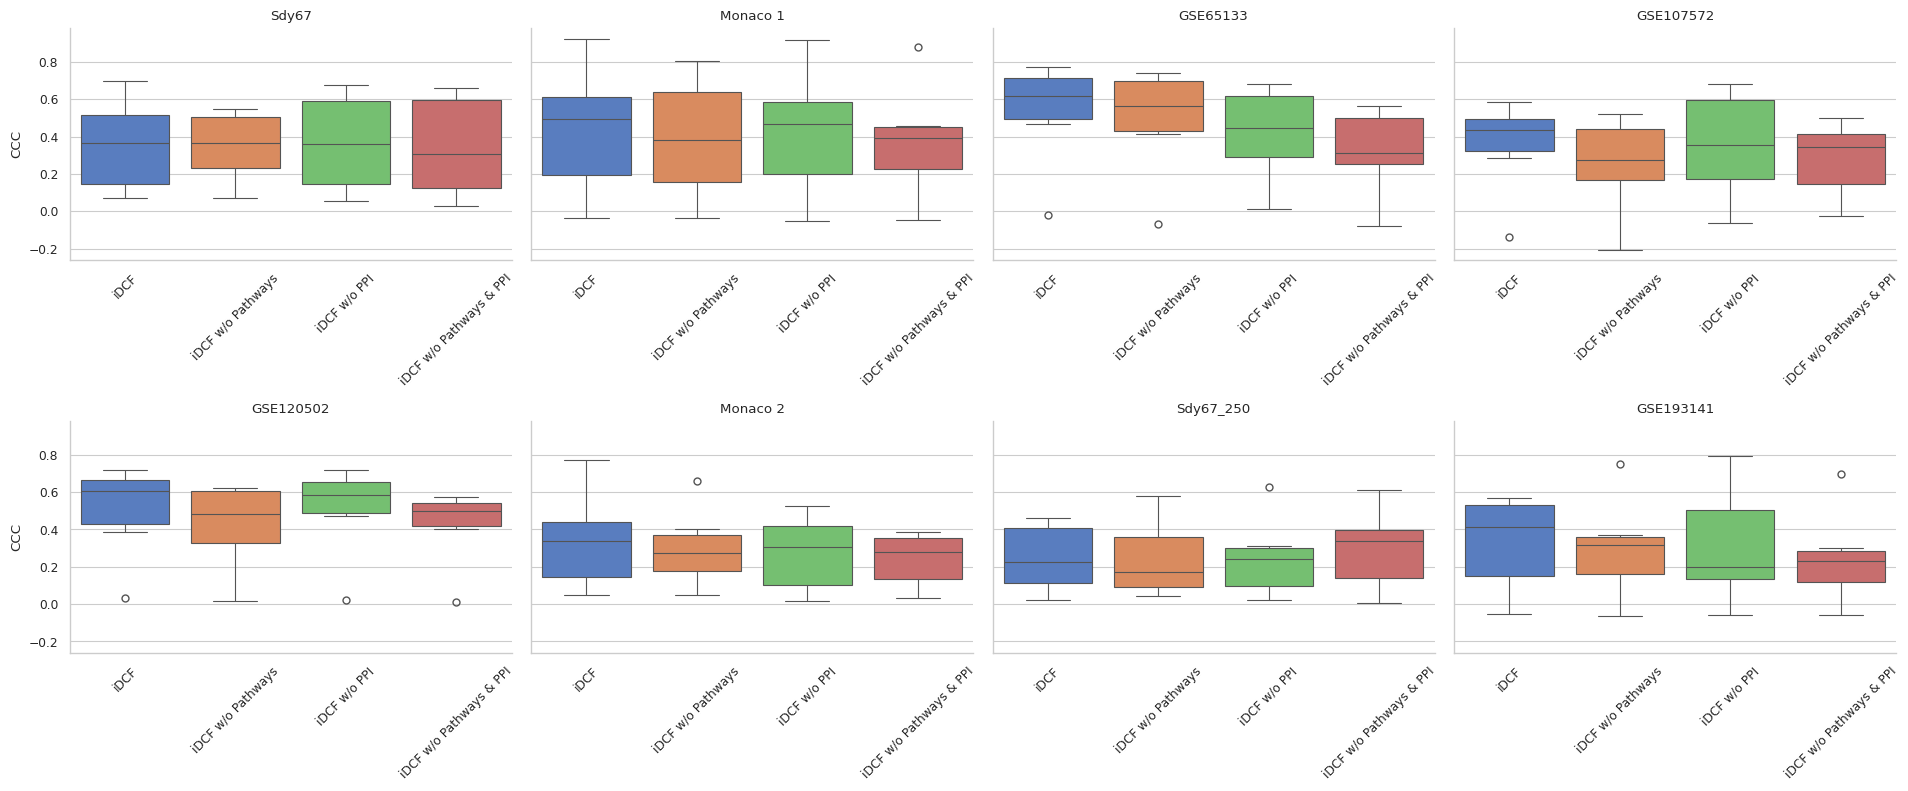

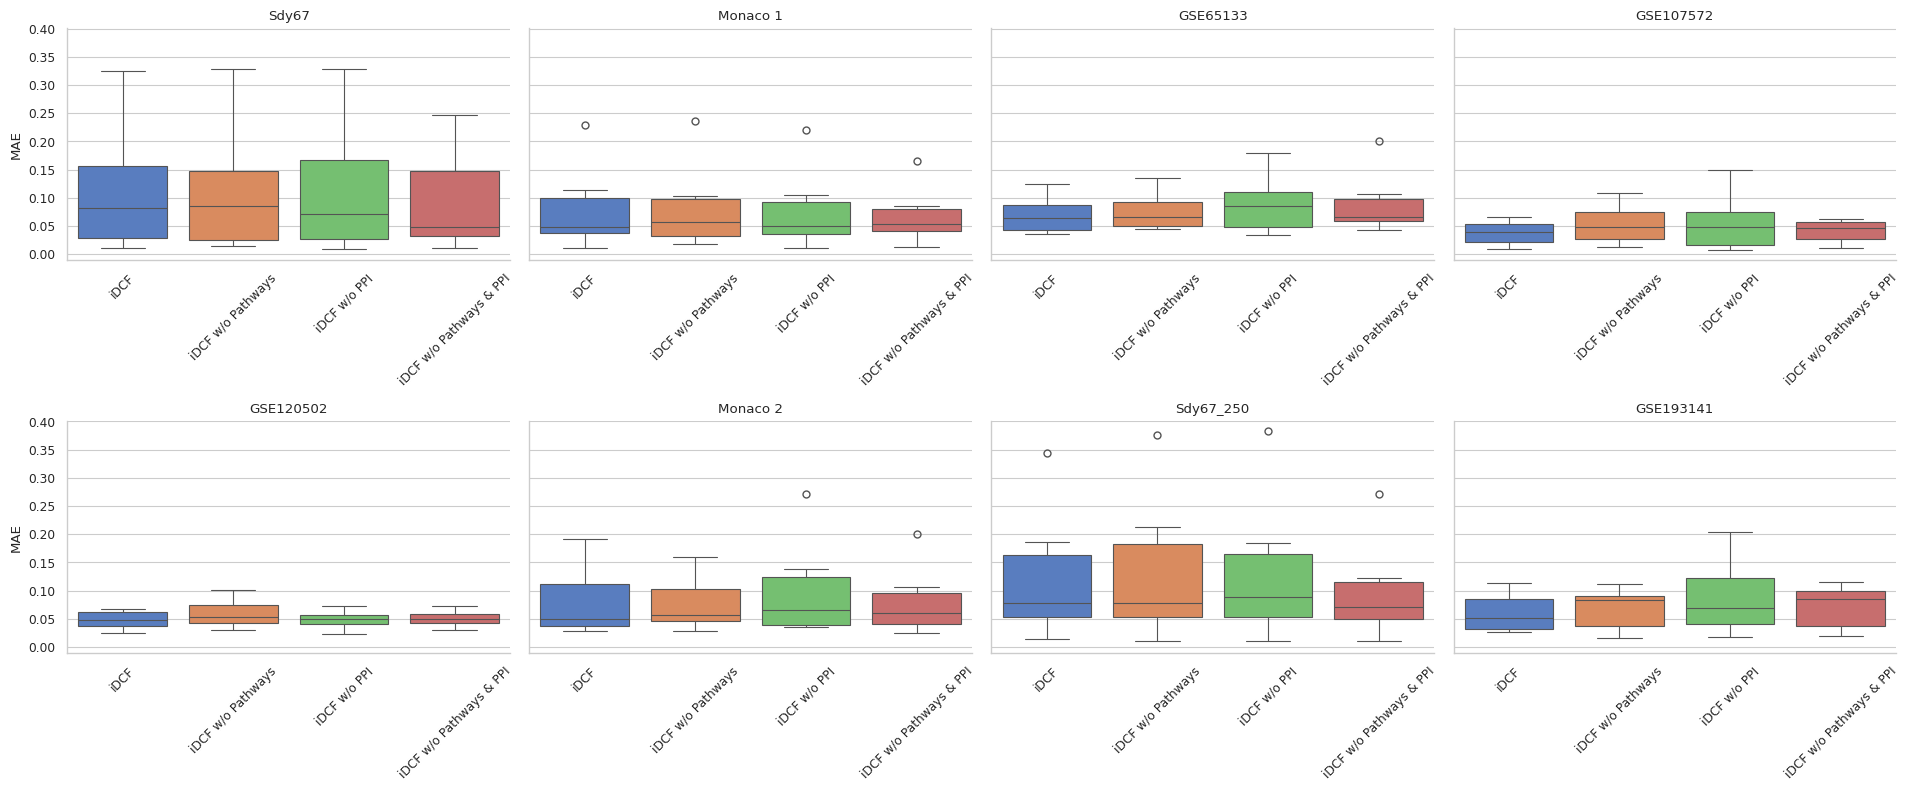

In [8]:
plot_boxplot(celltype_results, order, '../results/plot/ablation_boxplot')

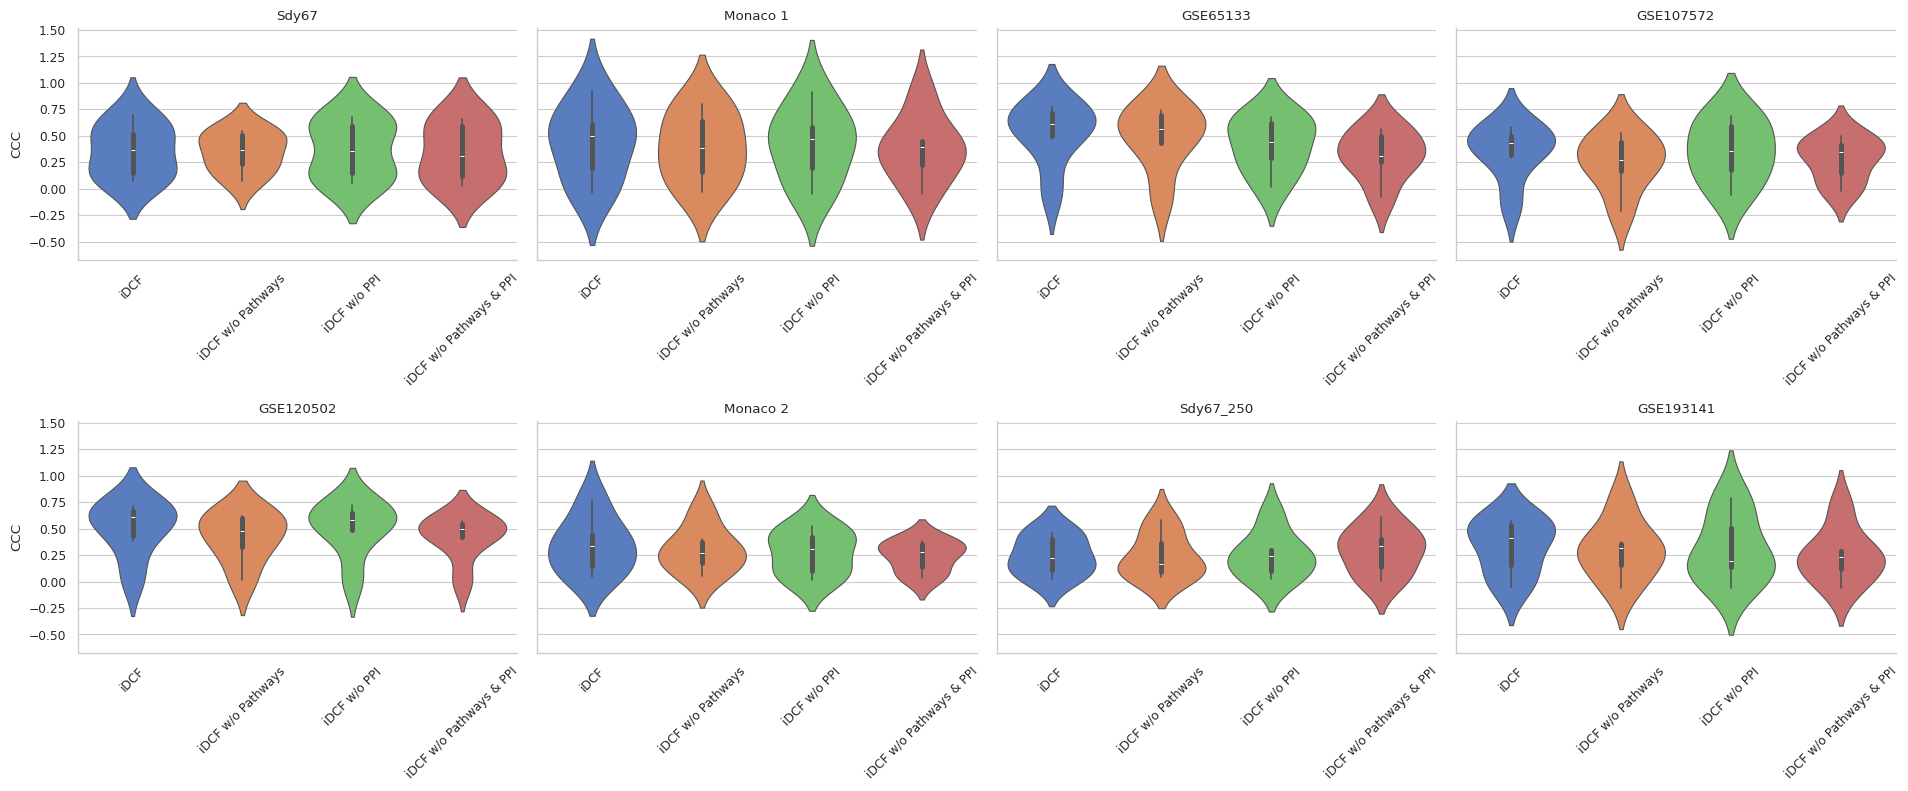

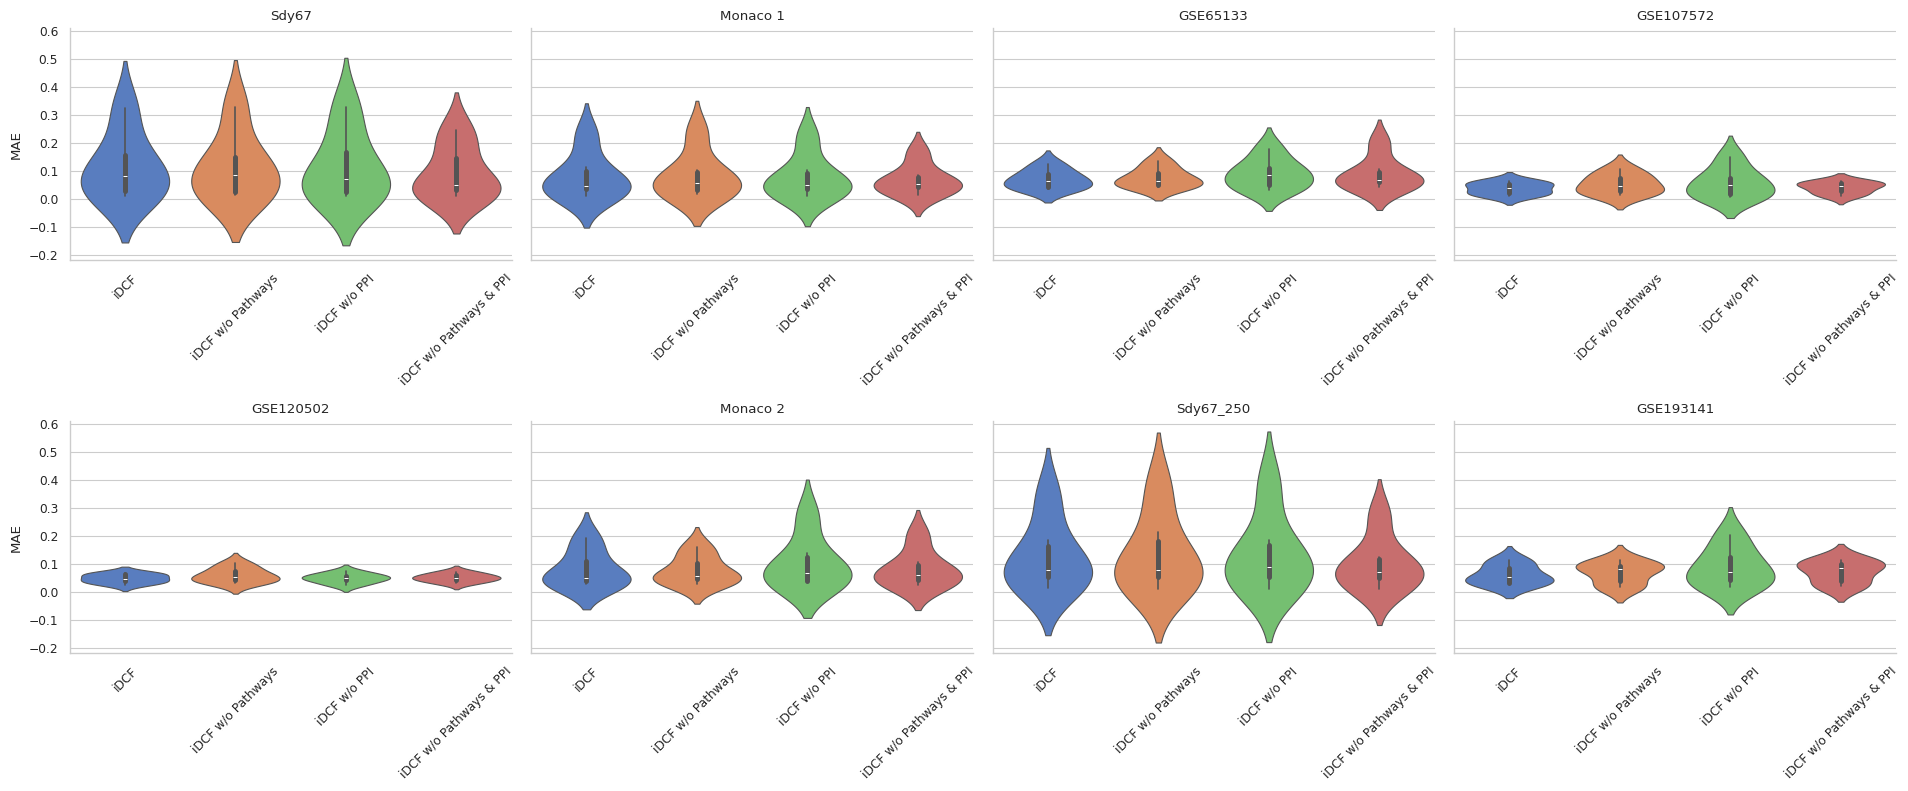

In [9]:
plot_violin(celltype_results, order, filename='../results/plot/ablation_violin')

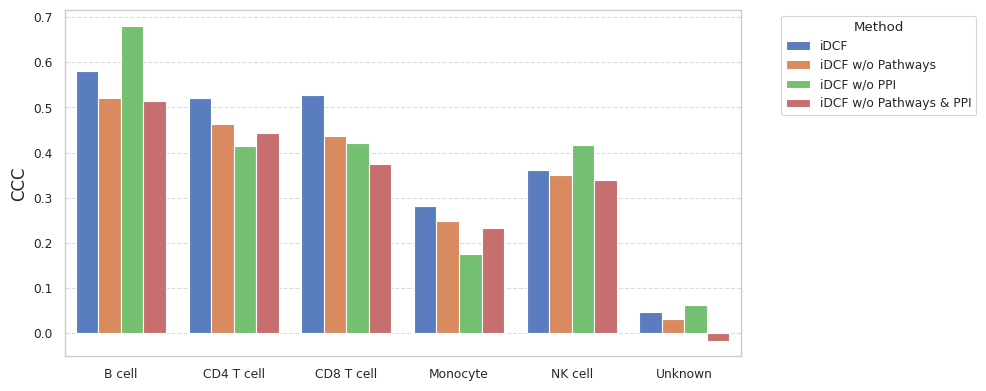

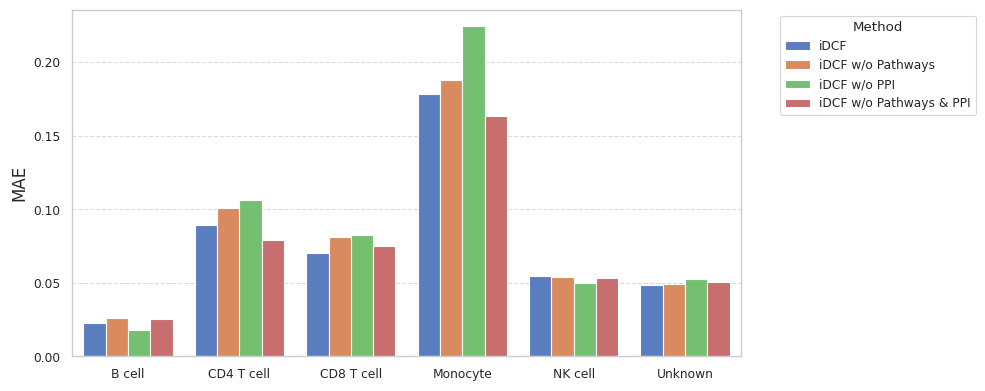

In [10]:
plot_ccc_comparison(celltype_results, metric='CCC', filename='../results/plot/ablation')
plot_ccc_comparison(celltype_results, metric='MAE', filename='../results/plot/ablation')

In [11]:
label_map = {
    'Bcells': 'B cell',
    'CD4Tcells': 'CD4 T cell',
    'CD8Tcells': 'CD8 T cell',
    'Monocytes': 'Monocyte',
    'NK': 'NK cell',
    'Unknown': 'Unknown'
}
# 根据label_map将celltype_results['CellType']中的细胞类型名称进行替换
celltype_results['CellType'] = celltype_results['CellType'].apply(lambda x: label_map.get(x, x))
celltype_results

,CellType,CCC,MAE,Dataset,Method
0,B cell,0.698479,0.011370,Sdy67,iDCF
1,CD4 T cell,0.503711,0.096680,Sdy67,iDCF
2,CD8 T cell,0.221667,0.175764,Sdy67,iDCF
3,Monocyte,0.069944,0.325638,Sdy67,iDCF
4,NK cell,0.123400,0.067753,Sdy67,iDCF
...,...,...,...,...,...
187,CD4 T cell,0.225194,0.097364,GSE193141,iDCF w/o Pathways & PPI
188,CD8 T cell,0.301518,0.071031,GSE193141,iDCF w/o Pathways & PPI
189,Monocyte,0.237760,0.114868,GSE193141,iDCF w/o Pathways & PPI
190,NK cell,0.080023,0.099683,GSE193141,iDCF w/o Pathways & PPI


In [12]:
# 根据celltype_results['Method']，对CCC和MAE取均值
celltype_mean_results = celltype_results.groupby(['CellType', 'Method']).agg({'CCC': 'mean', 'MAE': 'mean'}).reset_index()

In [13]:
# 根据celltype_results['Method']和['Dataset']，对CCC和MAE取均值
dataset_mean_results = celltype_results.groupby(['Dataset', 'Method']).agg({'CCC': 'mean', 'MAE': 'mean'}).reset_index()

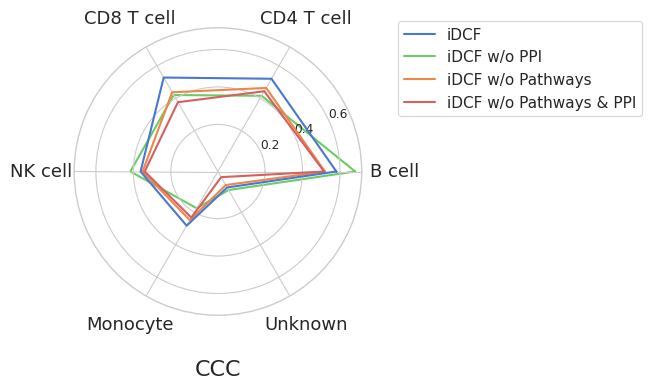

In [14]:
df_celltype_ccc_wide = celltype_mean_results.pivot_table(
    index='Method',
    columns='CellType',
    values='CCC'
)

cell_type_order = df_celltype_ccc_wide.columns.to_list()
mono_idx = cell_type_order.index('Monocyte')
nk_idx = cell_type_order.index('NK cell')
cell_type_order[mono_idx], cell_type_order[nk_idx] = cell_type_order[nk_idx], cell_type_order[mono_idx]

# 3. 使用新的顺序来重新排列DataFrame的列
df_celltype_ccc_wide = df_celltype_ccc_wide[cell_type_order]
# --- 重排DataFrame，让'iDCF'在最后 ---
method_order = df_celltype_ccc_wide.index.to_list()
if 'iDCF' in method_order:
    method_order.remove('iDCF')
    method_order.append('iDCF')
df_reordered = df_celltype_ccc_wide.reindex(method_order)


# --- 绘图代码 ---
labels = df_reordered.columns.to_list()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
# colors = sns.color_palette("Set2", len(df_reordered))

# --- 核心修改 1: 创建空列表来存储图例元素 ---
legend_handles = []
legend_labels = []

for i, (method_name, row) in enumerate(df_reordered.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]

    z_order = 10 if method_name == 'iDCF' else i

    # 将 ax.plot 返回的线条对象存储起来
    if method_name == 'iDCF':
        color = colors[0]
    elif method_name == 'iDCF w/o Pathways':
        color = colors[1]
    elif method_name == 'iDCF w/o PPI':
        color = colors[2]
    else:
        color = colors[3]
    line, = ax.plot(angles, values, color=color, linewidth=1.5, linestyle='solid', label=method_name, zorder=z_order)

    # 将线条对象和标签分别存入列表
    legend_handles.append(line)
    legend_labels.append(method_name)

# --- 美化 ---
ax.set_yticks([0.2, 0.4, 0.6])
# ax.set_yticklabels(["0.2", "0.4", "0.6"], color="grey", size=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=13)
ax.tick_params(axis='x', pad=12)
ax.set_rlabel_position(25)

# --- 核心修改 2: 手动创建并排序图例 ---
# 创建一个从方法名到图例元素的映射
handle_map = dict(zip(legend_labels, legend_handles))
# 按照原始（未重排）的顺序获取图例元素
original_order_handles = [handle_map[name] for name in df_celltype_ccc_wide.index]
original_order_labels = df_celltype_ccc_wide.index.to_list()

# 使用排序后的元素创建图例
plt.legend(handles=original_order_handles, labels=original_order_labels,
           loc='upper left', bbox_to_anchor=(1.1, 1.05), fontsize=11)


plt.subplots_adjust(right=0.7)

fig.canvas.draw()
ax_position = ax.get_position()
x_center = ax_position.x0 + ax_position.width / 2
fig.text(x_center, 0.1, 'CCC', ha='center', va='center', fontsize=16)

plt.savefig('../results/plot/ablation_radar_celltype_CCC.png', dpi=dpi, bbox_inches='tight')
plt.show()

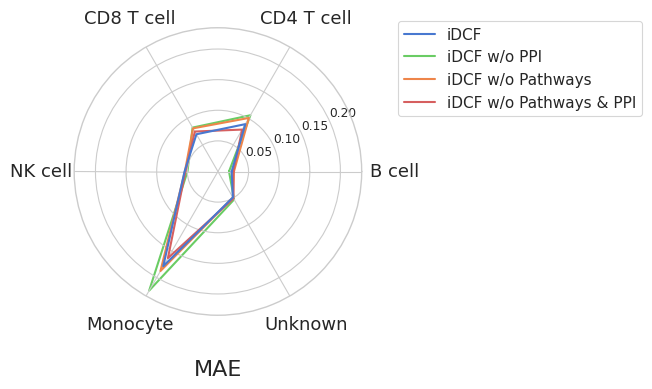

In [15]:
df_celltype_mae_wide = celltype_mean_results.pivot_table(
    index='Method',
    columns='CellType',
    values='MAE'
)
cell_type_order = df_celltype_mae_wide.columns.to_list()
mono_idx = cell_type_order.index('Monocyte')
nk_idx = cell_type_order.index('NK cell')
cell_type_order[mono_idx], cell_type_order[nk_idx] = cell_type_order[nk_idx], cell_type_order[mono_idx]

# 3. 使用新的顺序来重新排列DataFrame的列
df_celltype_mae_wide = df_celltype_mae_wide[cell_type_order]
# --- 重排DataFrame，让'iDCF'在最后 ---
method_order = df_celltype_mae_wide.index.to_list()
if 'iDCF' in method_order:
    method_order.remove('iDCF')
    method_order.append('iDCF')
df_reordered = df_celltype_mae_wide.reindex(method_order)


# --- 绘图代码 ---
labels = df_reordered.columns.to_list()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
# colors = sns.color_palette("Set2", len(df_reordered))

# --- 核心修改 1: 创建空列表来存储图例元素 ---
legend_handles = []
legend_labels = []

for i, (method_name, row) in enumerate(df_reordered.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]

    z_order = 10 if method_name == 'iDCF' else i

    if method_name == 'iDCF':
        color = colors[0]
    elif method_name == 'iDCF w/o Pathways':
        color = colors[1]
    elif method_name == 'iDCF w/o PPI':
        color = colors[2]
    else:
        color = colors[3]
    line, = ax.plot(angles, values, color=color, linewidth=1.5, linestyle='solid', label=method_name, zorder=z_order)

    # 将线条对象和标签分别存入列表
    legend_handles.append(line)
    legend_labels.append(method_name)

# --- 美化 ---
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
# ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], color="grey", size=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=13)
ax.tick_params(axis='x', pad=12)
ax.set_rlabel_position(25)

# --- 核心修改 2: 手动创建并排序图例 ---
# 创建一个从方法名到图例元素的映射
handle_map = dict(zip(legend_labels, legend_handles))
# 按照原始（未重排）的顺序获取图例元素
original_order_handles = [handle_map[name] for name in df_celltype_mae_wide.index]
original_order_labels = df_celltype_mae_wide.index.to_list()

# 使用排序后的元素创建图例
plt.legend(handles=original_order_handles, labels=original_order_labels,
           loc='upper left', bbox_to_anchor=(1.1, 1.05), fontsize=11)


plt.subplots_adjust(right=0.7)

fig.canvas.draw()
ax_position = ax.get_position()
x_center = ax_position.x0 + ax_position.width / 2
fig.text(x_center, 0.1, 'MAE', ha='center', va='center', fontsize=16)

plt.savefig('../results/plot/ablation_radar_celltype_MAE.png', dpi=dpi, bbox_inches='tight')
plt.show()

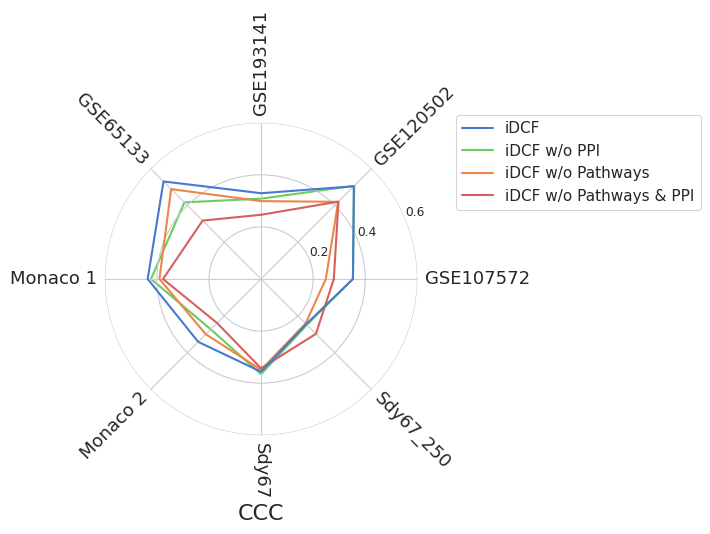

In [16]:
df_dataset_ccc_wide = dataset_mean_results.pivot_table(
    index='Method',
    columns='Dataset',
    values='CCC'
)
# --- 重排DataFrame，让'iDCF'在最后 ---
method_order = df_dataset_ccc_wide.index.to_list()
if 'iDCF' in method_order:
    method_order.remove('iDCF')
    method_order.append('iDCF')
df_reordered = df_dataset_ccc_wide.reindex(method_order)


# --- 绘图代码 ---
labels = df_reordered.columns.to_list()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles_closed = angles + angles[:1]

sns.set_style("whitegrid")
# 稍微增大画布尺寸，给标签留出更足的空间
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
# colors = sns.color_palette("Set2", len(df_reordered))

legend_handles, legend_labels = [], []
for i, (method_name, row) in enumerate(df_reordered.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]
    z_order = 10 if method_name == 'iDCF' else i
    if method_name == 'iDCF':
        color = colors[0]
    elif method_name == 'iDCF w/o Pathways':
        color = colors[1]
    elif method_name == 'iDCF w/o PPI':
        color = colors[2]
    else:
        color = colors[3]
    line, = ax.plot(angles_closed, values, color=color, linewidth=1.5, linestyle='solid', label=method_name, zorder=z_order)
    legend_handles.append(line)
    legend_labels.append(method_name)

# 1. 设置Y轴（半径）的网格线和范围
ax.set_yticks([0.2, 0.4, 0.6])
# ax.set_yticklabels(["0.2", "0.4", "0.6"], color="grey", size=10)
# ax.set_yticklabels([]) # 隐藏Y轴的数字标签
ax.set_ylim(0, 0.6)
ax.spines['polar'].set_visible(False) # 隐藏最外圈的圆环

# 2. 隐藏默认的X轴（角度）标签
ax.set_xticks(angles)
ax.set_xticklabels([])

# 3. 循环，手动为每个标签进行智能旋转和定位
for angle, label in zip(angles, labels):
    # 将角度转换为度数
    angle_deg = np.rad2deg(angle)

    # 核心逻辑：智能判断旋转角度和对齐方式
    if 90 < angle_deg < 270:
        # 对于左半侧的标签 (90度到270度之间)
        # 额外旋转180度，使其“翻正”
        rotation = angle_deg + 180
        # 水平对齐方式设为 right
        ha = 'right'
    else:
        # 对于右半侧的标签
        # 正常旋转
        rotation = angle_deg
        # 水平对齐方式设为 left
        ha = 'left'

    # 使用 ax.text 手动放置旋转且对齐的标签
    # 距离乘数 1.05 让标签刚好在最外圈外部一点点
    distance = ax.get_ylim()[1] * 1.05
    ax.text(angle, distance, label,
            size=13, ha=ha, va='center', rotation=rotation,
            # rotation_mode='anchor' 让文字围绕定位点旋转
            rotation_mode='anchor')


# 4. 设置图例
handle_map = dict(zip(legend_labels, legend_handles))
original_order_handles = [handle_map[name] for name in df_dataset_ccc_wide.index]
original_order_labels = df_dataset_ccc_wide.index.to_list()
plt.legend(handles=original_order_handles, labels=original_order_labels,
           loc='upper left', bbox_to_anchor=(1.1, 1.05), fontsize=11)

# 5. 调整整体布局并添加底部标题
plt.subplots_adjust(right=0.75, top=0.9, bottom=0.1)

fig.canvas.draw()
ax_position = ax.get_position()
x_center = ax_position.x0 + ax_position.width / 2
fig.text(x_center, 0.03, 'CCC', ha='center', va='center', fontsize=16)
plt.savefig('../results/plot/ablation_radar_dataset_CCC.png', dpi=dpi, bbox_inches='tight')

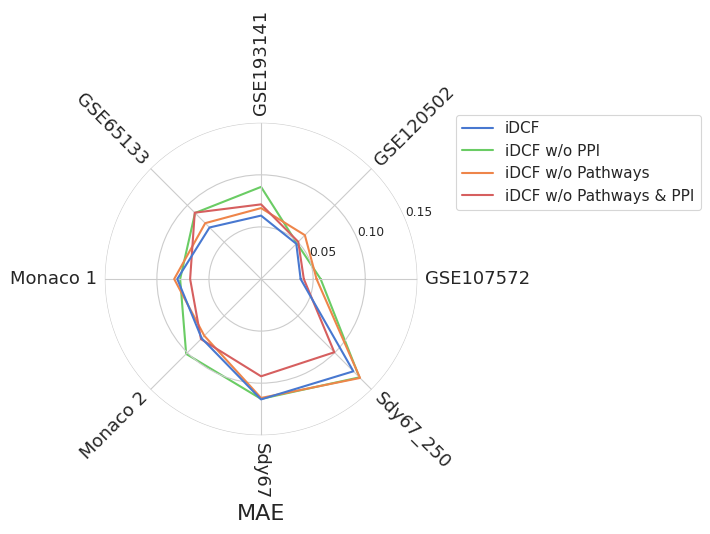

In [17]:
df_dataset_mae_wide = dataset_mean_results.pivot_table(
    index='Method',
    columns='Dataset',
    values='MAE'
)
# --- 重排DataFrame，让'iDCF'在最后 ---
method_order = df_dataset_mae_wide.index.to_list()
if 'iDCF' in method_order:
    method_order.remove('iDCF')
    method_order.append('iDCF')
df_reordered = df_dataset_mae_wide.reindex(method_order)


# --- 绘图代码 ---
labels = df_reordered.columns.to_list()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles_closed = angles + angles[:1]

sns.set_style("whitegrid")
# 稍微增大画布尺寸，给标签留出更足的空间
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
# colors = sns.color_palette("Set2", len(df_reordered))

legend_handles, legend_labels = [], []
for i, (method_name, row) in enumerate(df_reordered.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]
    z_order = 10 if method_name == 'iDCF' else i
    if method_name == 'iDCF':
        color = colors[0]
    elif method_name == 'iDCF w/o Pathways':
        color = colors[1]
    elif method_name == 'iDCF w/o PPI':
        color = colors[2]
    else:
        color = colors[3]
    line, = ax.plot(angles_closed, values, color=color, linewidth=1.5, linestyle='solid', label=method_name, zorder=z_order)
    legend_handles.append(line)
    legend_labels.append(method_name)

# 1. 设置Y轴（半径）的网格线和范围
ax.set_yticks([0.05, 0.10, 0.15])
# ax.set_yticklabels(["0.2", "0.4", "0.6"], color="grey", size=10)
# ax.set_yticklabels([]) # 隐藏Y轴的数字标签
# ax.set_ylim(0, 0.6)
ax.spines['polar'].set_visible(False) # 隐藏最外圈的圆环

# 2. 隐藏默认的X轴（角度）标签
ax.set_xticks(angles)
ax.set_xticklabels([])

# 3. 循环，手动为每个标签进行智能旋转和定位
for angle, label in zip(angles, labels):
    # 将角度转换为度数
    angle_deg = np.rad2deg(angle)

    # 核心逻辑：智能判断旋转角度和对齐方式
    if 90 < angle_deg < 270:
        # 对于左半侧的标签 (90度到270度之间)
        # 额外旋转180度，使其“翻正”
        rotation = angle_deg + 180
        # 水平对齐方式设为 right
        ha = 'right'
    else:
        # 对于右半侧的标签
        # 正常旋转
        rotation = angle_deg
        # 水平对齐方式设为 left
        ha = 'left'

    # 使用 ax.text 手动放置旋转且对齐的标签
    # 距离乘数 1.05 让标签刚好在最外圈外部一点点
    distance = ax.get_ylim()[1] * 1.05
    ax.text(angle, distance, label,
            size=13, ha=ha, va='center', rotation=rotation,
            # rotation_mode='anchor' 让文字围绕定位点旋转
            rotation_mode='anchor')


# 4. 设置图例
handle_map = dict(zip(legend_labels, legend_handles))
original_order_handles = [handle_map[name] for name in df_dataset_mae_wide.index]
original_order_labels = df_dataset_mae_wide.index.to_list()
plt.legend(handles=original_order_handles, labels=original_order_labels,
           loc='upper left', bbox_to_anchor=(1.1, 1.05), fontsize=11)

# 5. 调整整体布局并添加底部标题
plt.subplots_adjust(right=0.75, top=0.9, bottom=0.1)

fig.canvas.draw()
ax_position = ax.get_position()
x_center = ax_position.x0 + ax_position.width / 2
fig.text(x_center, 0.03, 'MAE', ha='center', va='center', fontsize=16)
plt.savefig('../results/plot/ablation_radar_dataset_MAE.png', dpi=dpi, bbox_inches='tight')